In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.config import DADOS_ORIGINAIS
from src.graficos import PALETTE, SCATTER_ALPHA

sns.set_theme(palette="bright")

In [2]:
df = pd.read_csv(DADOS_ORIGINAIS, compression="zip")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.describe(exclude="number")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


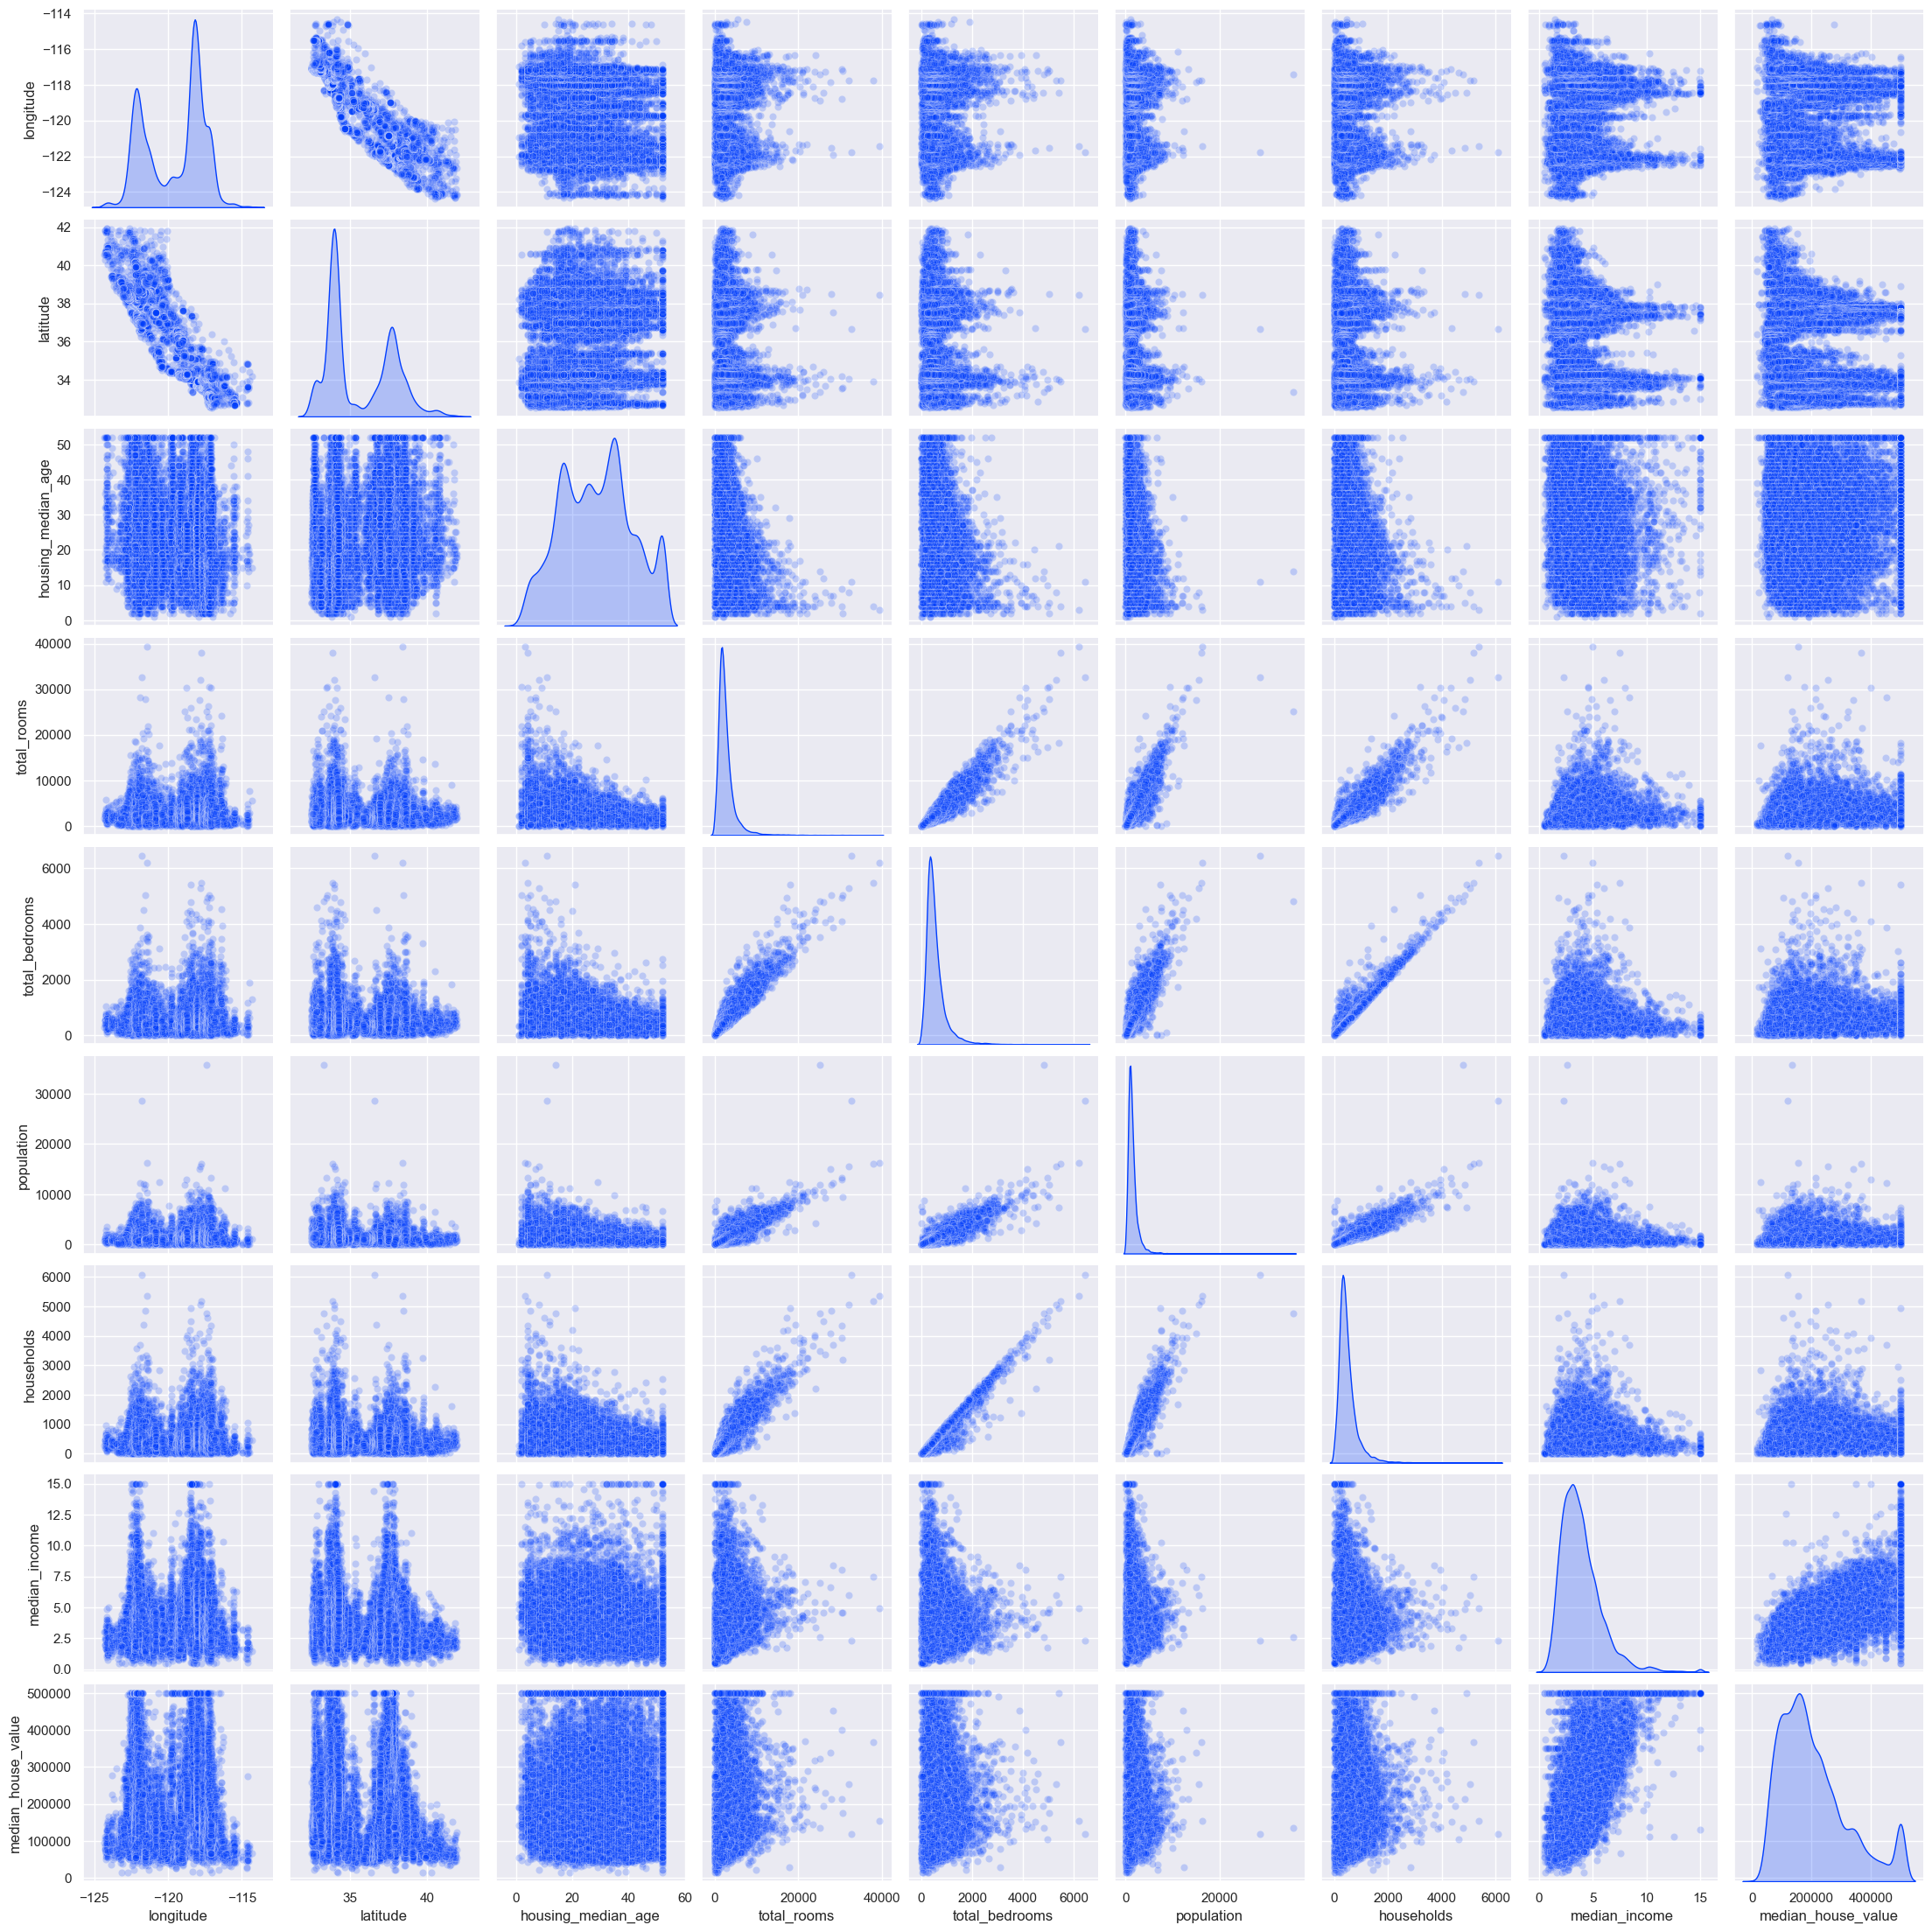

In [7]:
sns.pairplot(df, diag_kind="kde", plot_kws=dict(alpha=SCATTER_ALPHA))

In [8]:
df.select_dtypes("number").skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

In [9]:
df.select_dtypes("number").kurtosis()

longitude             -1.330152
latitude              -1.117760
housing_median_age    -0.800629
total_rooms           32.630927
total_bedrooms        21.985575
population            73.553116
households            22.057988
median_income          4.952524
median_house_value     0.327870
dtype: float64

In [10]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [11]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [12]:
df[df.isnull().any(axis=1)].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,207.000000,207.000000,207.000000,207.000000,0.0,207.000000,207.000000,207.000000,207.000000
mean,-119.472560,35.497633,29.270531,2562.603865,NaN,1477.772947,510.024155,3.822244,206007.280193
std,2.001424,2.097298,11.964927,1787.269789,NaN,1057.448212,386.120704,1.955595,111638.214545
min,-124.130000,32.660000,4.000000,154.000000,NaN,37.000000,16.000000,0.852700,45800.000000
25%,-121.810000,33.970000,19.000000,1307.500000,NaN,781.000000,258.000000,2.564150,128750.000000
50%,-118.490000,34.200000,30.000000,2155.000000,NaN,1217.000000,427.000000,3.411500,175000.000000
75%,-117.985000,37.495000,38.000000,3465.000000,NaN,1889.500000,628.000000,4.615750,267700.000000
max,-114.590000,40.920000,52.000000,11709.000000,NaN,7604.000000,3589.000000,15.000100,500001.000000


In [13]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

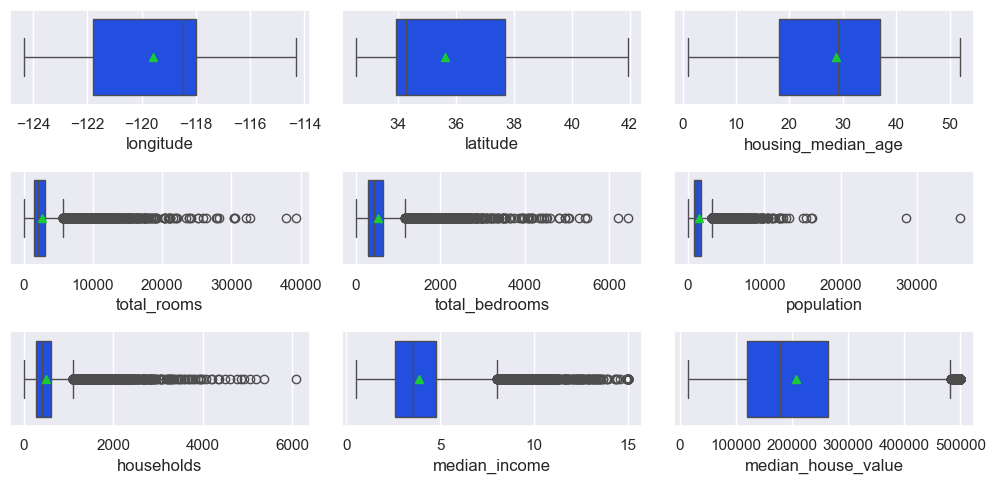

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(10, 5))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.boxplot(data=df, x=coluna, ax=ax, showmeans=True)

plt.tight_layout()

plt.show()

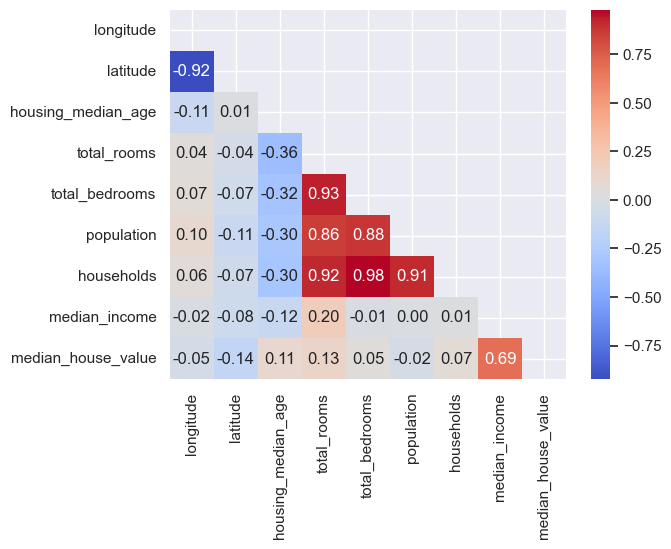

In [15]:
matriz = np.triu(df.select_dtypes("number").corr())

fig, ax = plt.subplots()

sns.heatmap(
    df.select_dtypes("number").corr(),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE
)

plt.show()

Algumas variáveis novas:

- criar classes em `median_income`
- cômodos por domicílio
- pessoas por domicílio
- quartos por cômodos

In [16]:
df["median_income_cat"] = pd.cut(
    df["median_income"],
    bins=[0, 1.5, 3, 4.5, 6, np.inf],
    labels=[1, 2, 3, 4, 5],
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  median_income_cat   20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
df["median_income_cat"].value_counts().sort_index()

median_income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

<Axes: xlabel='median_income_cat'>

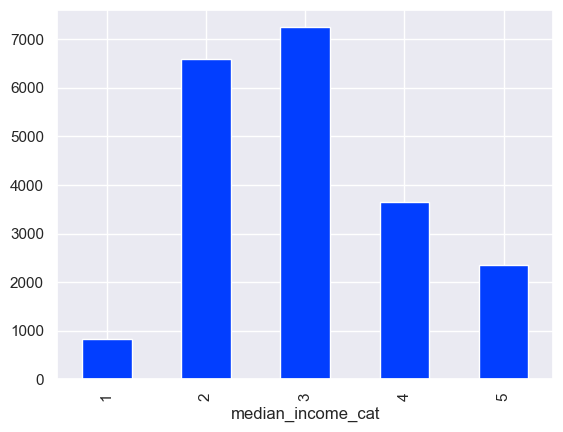

In [18]:
df["median_income_cat"].value_counts().sort_index().plot(kind="bar")

In [19]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_income_cat'],
      dtype='object')

In [20]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["population_per_household"] = df["population"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  median_income_cat         20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  population_per_household  20640 non-null  float64 
 13  bedrooms_per_room         20433 non-null  floa

In [21]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,3.070655,0.213039
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,10.386050,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,2.429741,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,2.818116,0.203162
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,3.282261,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


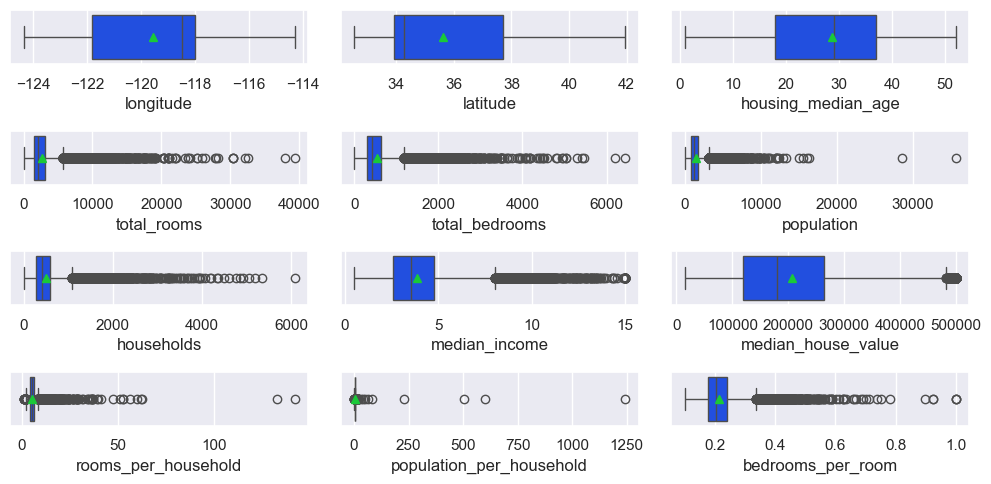

In [22]:
fig, axs = plt.subplots(4, 3, figsize=(10, 5))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.boxplot(data=df, x=coluna, ax=ax, showmeans=True)

plt.tight_layout()

plt.show()

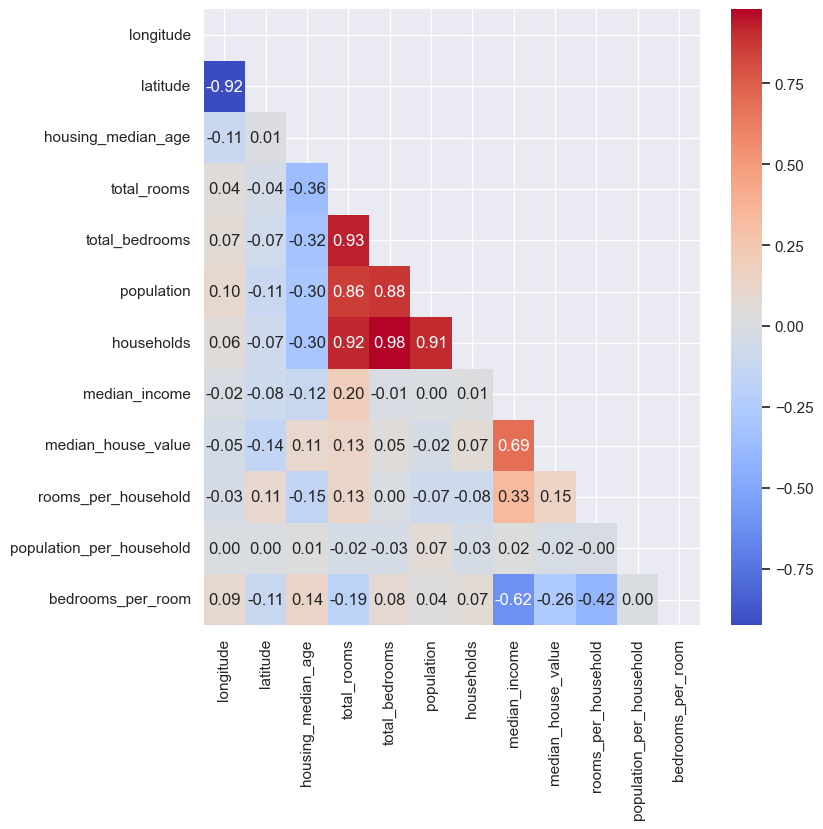

In [23]:
matriz = np.triu(df.select_dtypes("number").corr())

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(
    df.select_dtypes("number").corr(),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE
)

plt.show()

In [26]:
df[
    df["median_house_value"] == df["median_house_value"].max()
]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY,1,2.929412,4.658824,0.313253
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY,1,2.436000,5.396000,0.387521
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY,5,7.794393,2.415888,0.134892
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY,5,7.512097,2.754032,0.127214
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY,5,8.282548,2.623269,0.126756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN,4,6.958333,2.666667,0.174983
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN,5,9.890756,3.487395,0.117247
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN,5,7.236059,2.553439,0.142692
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN,5,9.873315,3.177898,0.111657


In [27]:
965 / df.shape[0]

0.04675387596899225

In [34]:
df["median_house_value"].quantile(0.95)

np.float64(489809.9999999999)

In [35]:
df_clean = df.copy()

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  median_income_cat         20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  population_per_household  20640 non-null  float64 
 13  bedrooms_per_room         20433 non-null  floa

In [36]:
QUANTIL = 0.99

df_clean = df_clean[
    (df["housing_median_age"] < df["housing_median_age"].quantile(QUANTIL))
    & (df["total_rooms"] < df["total_rooms"].quantile(QUANTIL))
    & (df["total_bedrooms"] < df["total_bedrooms"].quantile(QUANTIL))
    & (df["population"] < df["population"].quantile(QUANTIL))
    & (df["households"] < df["households"].quantile(QUANTIL))
    & (df["median_income"] < df["median_income"].quantile(QUANTIL))
    & (df["median_house_value"] < df["median_house_value"].quantile(QUANTIL))
    & (df["rooms_per_household"] < df["rooms_per_household"].quantile(QUANTIL))
    & (df["population_per_household"] < df["population_per_household"].quantile(QUANTIL))
    & (df["bedrooms_per_room"] < df["bedrooms_per_room"].quantile(QUANTIL))
]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17566 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17566 non-null  float64 
 1   latitude                  17566 non-null  float64 
 2   housing_median_age        17566 non-null  float64 
 3   total_rooms               17566 non-null  float64 
 4   total_bedrooms            17566 non-null  float64 
 5   population                17566 non-null  float64 
 6   households                17566 non-null  float64 
 7   median_income             17566 non-null  float64 
 8   median_house_value        17566 non-null  float64 
 9   ocean_proximity           17566 non-null  object  
 10  median_income_cat         17566 non-null  category
 11  rooms_per_household       17566 non-null  float64 
 12  population_per_household  17566 non-null  float64 
 13  bedrooms_per_room         17566 non-null  float64 


In [37]:
1 - df_clean.shape[0] / df.shape[0]

0.14893410852713174

In [38]:
df_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
count,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000,17566.000000
mean,-119.509858,35.601950,27.276955,2510.361152,515.361209,1386.223557,483.953034,3.696453,189591.204486,5.253849,2.934597,0.211654
std,1.984173,2.147246,11.323320,1593.957111,320.838680,844.886263,295.554440,1.541904,95988.907554,1.134053,0.691400,0.048323
min,-124.300000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.714286,0.750000,0.113535
25%,-121.600000,33.920000,18.000000,1464.250000,300.000000,816.000000,287.000000,2.547325,114300.000000,4.446441,2.470168,0.176919
50%,-118.460000,34.240000,28.000000,2131.000000,438.000000,1196.000000,415.000000,3.479200,171400.000000,5.205218,2.852579,0.203474
75%,-117.980000,37.670000,36.000000,3124.000000,643.000000,1738.000000,605.000000,4.622150,243800.000000,5.960973,3.306344,0.239171
max,-114.550000,41.950000,51.000000,11026.000000,2205.000000,5804.000000,1979.000000,10.594100,500000.000000,10.352941,5.392954,0.406295
